In [1]:
from importlib import reload
import numpy as np 
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.ioff()
%matplotlib inline
import seaborn as sns
import pandas as pd
import gseapy
from gseapy.plot import barplot, dotplot
import networkx as nx
import OmicsIntegrator as oi
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import community 
import pickle
import itertools

import get_binarized_map_of_selected_loci_2 as diff

In [2]:
# Reload modules in case of modifications
reload(diff)

<module 'get_binarized_map_of_selected_loci_2' from '/home/braunger/masterthesis/python_code/compare_hic/get_binarized_map_of_selected_loci_2.py'>

In [3]:
save_dir = '/home/braunger/masterthesis/save/'
hic_dir = save_dir + 'processed_hic_data/'
fig_dir = '/home/braunger/masterthesis/save/figures/compare_hic/'
data_dir = '/home/braunger/masterthesis/data/'

# 1. Number of intermingling regions per chromosome pair

## a) Same number of intermingling regions (threshold young: 15, old: 40)

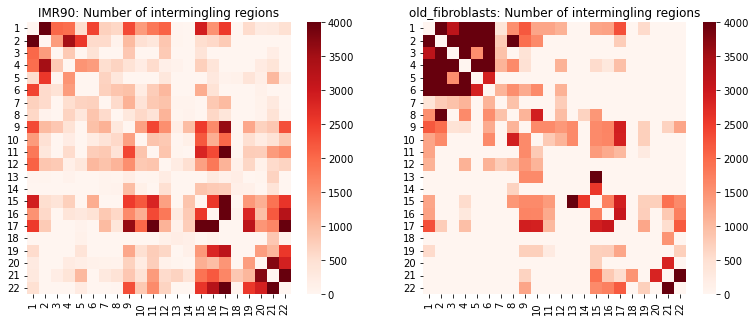

In [4]:
chr_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
%matplotlib inline
fig, axs = plt.subplots(1, 2, figsize = (13, 5))
diff.plot_intermingling_regions(chr_list, hic_dir, "IMR90", 'intermingling_regions', 15, axs[0])
diff.plot_intermingling_regions(chr_list, hic_dir, "old_fibroblasts", 'intermingling_regions', 40, axs[1])
plt.show()

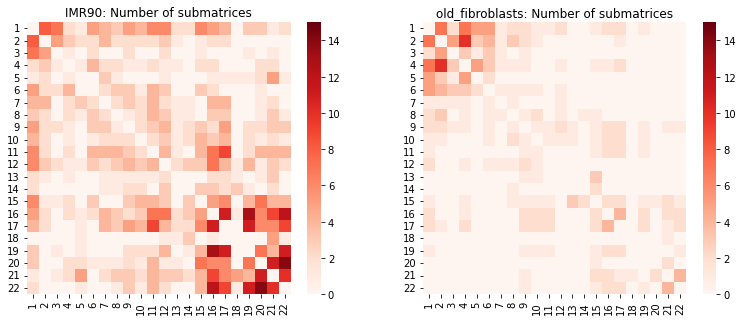

In [5]:
fig, axs = plt.subplots(1, 2, figsize = (13, 5))
diff.plot_intermingling_regions(chr_list, hic_dir, "IMR90", 'LAS', 15, axs[0])
diff.plot_intermingling_regions(chr_list, hic_dir, "old_fibroblasts", 'LAS', 40, axs[1])
plt.show()

In [6]:
young_statistics = diff.LAS_statistics(chr_list, hic_dir, 'IMR90', 15)
old_statistics = diff.LAS_statistics(chr_list, hic_dir, 'old_fibroblasts', 40)

print('For young fibroblasts there are ', int(young_statistics['intermingling_regions'].sum()), ' intermingling regions', 
     ' and ', int(young_statistics['LAS'].sum()), ' submatrices.')
print('For old fibroblasts there are ', int(old_statistics['intermingling_regions'].sum()), ' intermingling regions', 
     ' and ', int(old_statistics['LAS'].sum()), ' submatrices.')

For young fibroblasts there are  182139  intermingling regions  and  559  submatrices.
For old fibroblasts there are  202201  intermingling regions  and  176  submatrices.


## b) Same number of submatrices (threshold young: 15, old: 30)

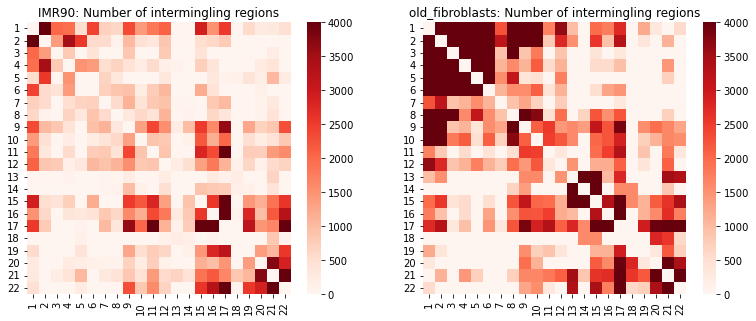

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (13, 5))
diff.plot_intermingling_regions(chr_list, hic_dir, "IMR90", 'intermingling_regions', 15, axs[0])
diff.plot_intermingling_regions(chr_list, hic_dir, "old_fibroblasts", 'intermingling_regions', 30, axs[1])
plt.show()

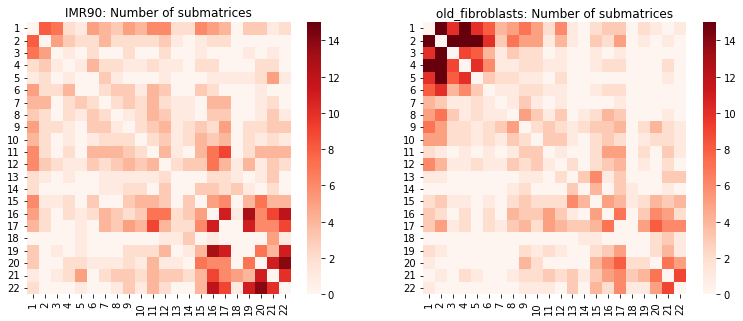

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (13, 5))
diff.plot_intermingling_regions(chr_list, hic_dir, "IMR90", 'LAS', 15, axs[0])
diff.plot_intermingling_regions(chr_list, hic_dir, "old_fibroblasts", 'LAS', 30, axs[1])
plt.show()

In [9]:
young_statistics = diff.LAS_statistics(chr_list, hic_dir, 'IMR90', 15)
old_statistics = diff.LAS_statistics(chr_list, hic_dir, 'old_fibroblasts', 30)

print('For young fibroblasts there are ', int(young_statistics['intermingling_regions'].sum()), ' intermingling regions', 
     ' and ', int(young_statistics['LAS'].sum()), ' submatrices.')
print('For old fibroblasts there are ', int(old_statistics['intermingling_regions'].sum()), ' intermingling regions', 
     ' and ', int(old_statistics['LAS'].sum()), ' submatrices.')

For young fibroblasts there are  182139  intermingling regions  and  559  submatrices.
For old fibroblasts there are  513169  intermingling regions  and  547  submatrices.


## c) Something in between (threshold young: 15, old: 35)

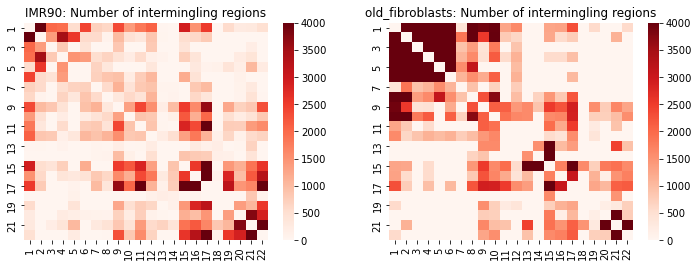

In [32]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
diff.plot_intermingling_regions(chr_list, hic_dir, "IMR90", 'intermingling_regions', 15, axs[0])
diff.plot_intermingling_regions(chr_list, hic_dir, "old_fibroblasts", 'intermingling_regions', 35, axs[1])
plt.savefig(fig_dir + 'number_of_intermingling_regions.png')
plt.show()

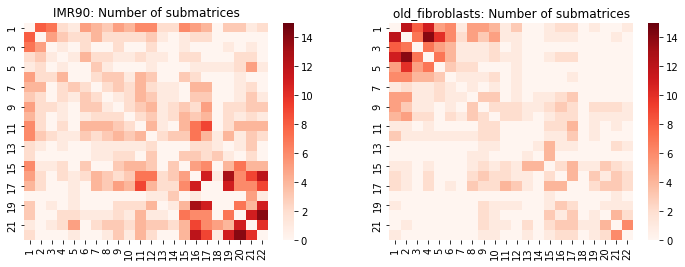

In [33]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
diff.plot_intermingling_regions(chr_list, hic_dir, "IMR90", 'LAS', 15, axs[0])
diff.plot_intermingling_regions(chr_list, hic_dir, "old_fibroblasts", 'LAS', 35, axs[1])
plt.savefig(fig_dir + 'number_of_submatrices.png')
plt.show()

In [30]:
young_statistics = diff.LAS_statistics(chr_list, hic_dir, 'IMR90', 15)
old_statistics = diff.LAS_statistics(chr_list, hic_dir, 'old_fibroblasts', 35)

print('For young fibroblasts there are ', int(young_statistics['intermingling_regions'].sum()), ' intermingling regions', 
     ' and ', int(young_statistics['LAS'].sum()), ' submatrices.')
print('For old fibroblasts there are ', int(old_statistics['intermingling_regions'].sum()), ' intermingling regions', 
     ' and ', int(old_statistics['LAS'].sum()), ' submatrices.')

For young fibroblasts there are  182139  intermingling regions  and  559  submatrices.
For old fibroblasts there are  337939  intermingling regions  and  322  submatrices.


# 2. Binarized maps for BACH2 targets

In [10]:
selected_loci = pd.read_csv(save_dir + 'TF_targets/BACH2_targets_loci.csv')
DE_genes = pd.read_csv(data_dir + 'de_data/DE_var_p_n_200.csv')
DE_genes['DE'] = 'True'
DE_genes = DE_genes[['gene', 'DE']]

selected_loci = selected_loci.merge(DE_genes, how = "left")
selected_loci['DE'] = selected_loci['DE'].fillna('False')
selected_loci.head()

,gene,locus,DE
0,ACAP3,chr_1_loc_1250000,False
1,ATAD3A,chr_1_loc_1500000,True
2,GNB1,chr_1_loc_1750000,False
3,NPHP4,chr_1_loc_5750000,False
4,KCNAB2,chr_1_loc_5750000,False


## a) Binarized maps for young and old fibroblasts

In [147]:
IMR90 = pd.read_csv(hic_dir+'processed_hic_data_IMR90/binarized_maps/BACH2_subset.csv', index_col = 0)
old_fibroblasts = pd.read_csv(hic_dir+'processed_hic_data_old_fibroblasts/binarized_maps/BACH2_subset.csv', index_col = 0)

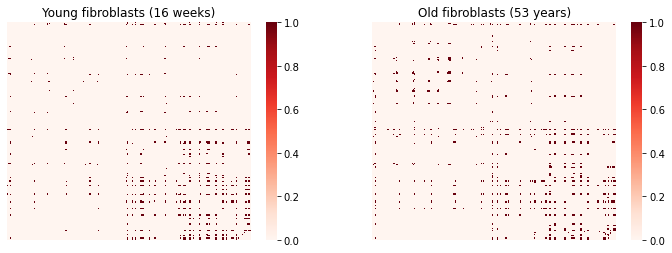

In [148]:
%matplotlib inline
diff.plot_binarized_maps(IMR90,old_fibroblasts)
plt.savefig(fig_dir + 'binarized_hic_BACH2.png')

/home/braunger/miniconda3/envs/pcst/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/braunger/miniconda3/envs/pcst/lib/python3.7/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


<Figure size 432x288 with 0 Axes>

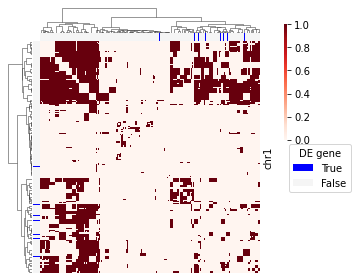

In [149]:
# Young fibroblast clustering
young_sub = IMR90.loc[(IMR90!=0).any(axis=1), (IMR90!=0).any(axis=1)]
diff.plot_clustered_anno(young_sub, selected_loci)

<Figure size 432x288 with 0 Axes>

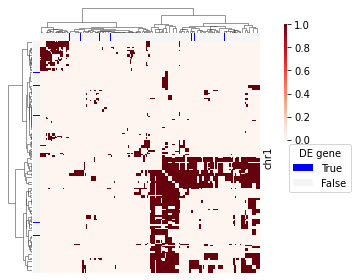

In [150]:
# Old fibroblast clustering
old_sub = old_fibroblasts.loc[(old_fibroblasts!=0).any(axis=1), (old_fibroblasts!=0).any(axis=1)]
diff.plot_clustered_anno(old_sub, selected_loci)

## b) Clustering of the difference matrix

In [151]:
# Differences between young and old
diff_map = IMR90 - old_fibroblasts

# Color map: including the similarities
color_map = IMR90 + 2 * old_fibroblasts

# Filter for loci that are contained in a LAS in at least one of the celltypes
color_map = color_map.loc[(color_map!=0).any(axis=1), (color_map!=0).any(axis=1)]
diff_map = diff_map.loc[color_map.index, color_map.index]

# Save results
color_map.to_csv(hic_dir + 'difference_maps/comp_map_BACH2_targets.csv')
diff_map.to_csv(hic_dir + 'difference_maps/diff_BACH2_targets.csv')

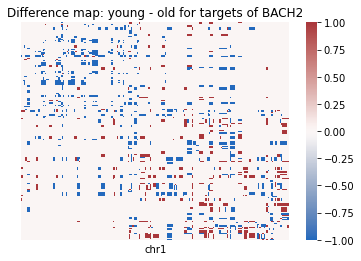

In [152]:
plt.figure()
sns.heatmap(diff_map, cmap = "vlag", xticklabels=False, yticklabels=False)
plt.title("Difference map: young - old for targets of BACH2")
plt.ylabel("")

plt.savefig(fig_dir + 'difference_map_BACH2.png')
plt.show()

<Figure size 432x288 with 0 Axes>

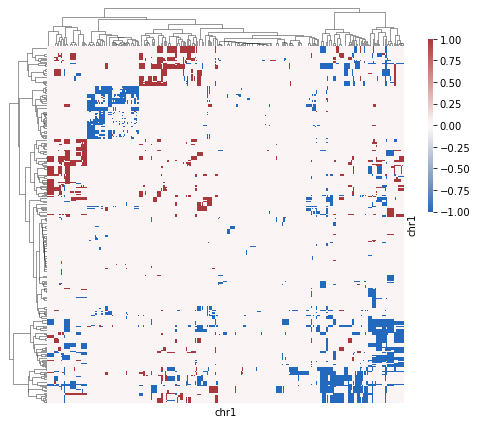

In [153]:
# Plot clustered differences
plt.figure()
p = sns.clustermap(diff_map,
               method='ward',
               metric='euclidean',
               row_cluster=True, col_cluster=True,
               figsize=(6,6),
               xticklabels=False, yticklabels=False,
               cmap='vlag', cbar_pos=(1, 0.5, 0.01, .4),
               vmin=-1, vmax=1,
               dendrogram_ratio=(.1, .1))
order = p.dendrogram_row.reordered_ind
plt.savefig(fig_dir+'clustered_diff_map_BACH2.png')
plt.show()

In [154]:
color_map = color_map.iloc[order, order]

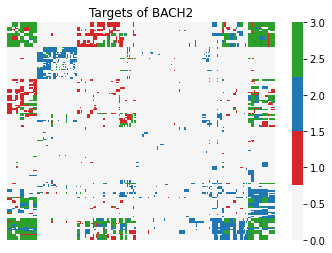

In [155]:
# Add common interaction in green
plt.figure()

# define colors
palette = sns.color_palette("tab10")
colors = ['whitesmoke', palette[3], palette[0], palette[2]]
cmap = ListedColormap(colors)

sns.heatmap(color_map, cmap = cmap, xticklabels=False, yticklabels=False)
plt.title("Targets of BACH2")
plt.ylabel("")
plt.savefig(fig_dir + 'BACH2_sorted_differences.png')
plt.show()

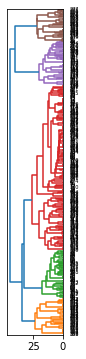

[1 2 3 4 5] [ 41  53 184  49  36]


In [156]:
# Hierarchical clustering
# create dendrogram
dend = linkage(diff_map, method='ward', metric='euclidean')
plt.figure(figsize = (1, 6))
dendrogram(dend, orientation = "left", color_threshold = 28)
plt.show()

clusters = fcluster(dend, 28, criterion = 'distance')
loci_clusters = pd.DataFrame({'locus': diff_map.index, 'cluster': clusters})
loci_clusters['chrom'] = loci_clusters['locus'].str.split('_').str[1]
loci_clusters = loci_clusters.merge(selected_loci, how = "left", on = 'locus')
loci_clusters.to_csv(hic_dir + 'difference_maps/hierarchical_clusters_BACH2.csv', index = False)

unique, counts = np.unique(clusters, return_counts=True)
print(unique, counts)
# 1 = orange, 2 = green, 3 = red, 4 = purple

In [160]:
# Enrichment of the loci in the right group (cluster 4)
loci = loci_clusters.loc[loci_clusters['cluster'] == 2, 'locus']
selected_genes = selected_loci.loc[selected_loci['locus'].isin(loci), 'gene']

# GSEA on old genes
enr = gseapy.enrichr(gene_list= selected_genes, 
                     gene_sets='GO_Biological_Process_2021', 
                     description='',  format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='Cluster 5',
        cutoff=0.05, top_term=10, figsize=(7, 5), color='salmon')

2022-08-04 17:26:24,729 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


In [82]:
pd.Series([loc.split("_")[1] for loc in loci]).value_counts().rename_axis('chromosomes').reset_index(name='number of loci').transpose()

,0,1,2
chromosomes,17,15,16
number of loci,13,10,8


## c) Difference matrix as a graph

In [145]:
# Visualize heatmap as a graph (only expressed loci)
expression_clusters = pd.read_csv(hic_dir + 'difference_maps/BACH2_expression_clusters.csv')
expression_clusters = expression_clusters.merge(selected_loci, on = 'gene')
expression_clusters = expression_clusters[['cluster', 'locus']].drop_duplicates()
color_map = color_map.loc[color_map.columns.isin(expression_clusters['locus']), color_map.columns.isin(expression_clusters['locus'])]

# From numbers to labels
color_map = color_map.replace({0: 'no interaction', 1: 'young-specific interaction',
                              2: 'old-specific interaction', 3: 'common interaction'})

# To long format
diff_long = pd.melt(color_map.reset_index(), id_vars='chr1')
diff_long = diff_long[diff_long['value'] != 'no interaction']
diff_long.columns = ['loc1', 'loc2', 'diff']

network = nx.from_pandas_edgelist(diff_long, 'loc1', 'loc2', 'diff')

# add hierarchical clusters as node attributes
clusters_dict = {loci_clusters.loc[index, 'locus']: str(loci_clusters.loc[index, 'cluster']) for index in loci_clusters.index}
nx.set_node_attributes(network, clusters_dict, name='hierarchical-clusters')

# add Louvain clusters
partition = community.best_partition(network)
partition = {loc: str(cluster) for loc, cluster in partition.items()}
nx.set_node_attributes(network, partition, name='louvain-clusters')

# add chromosome number
chrom_number = {loc: loc.split("_")[1] for loc in color_map.columns}
nx.set_node_attributes(network, chrom_number, name='chromosome_number')

# add expression clusters
expr_dict = {loc: str(expression_clusters.loc[expression_clusters['locus'] == loc, 'cluster'].tolist()[0]) for loc in color_map.columns}
nx.set_node_attributes(network, expr_dict, name='expression_pattern_clusters')

oi.output_networkx_graph_as_interactive_html(network, filename=fig_dir + "diff_net_BACH2.html")

PosixPath('/home/braunger/masterthesis/save/figures/compare_hic/diff_net_BACH2.html')

In [41]:
# save louvain clusters
louvain_clusters = pd.DataFrame.from_dict(partition, orient='index').reset_index()
louvain_clusters.columns = ['locus', 'cluster']
louvain_clusters = louvain_clusters.merge(selected_loci, how = "left", on = 'locus')
louvain_clusters.to_csv(hic_dir + 'difference_maps/louvain_clusters_BACH2.csv', index = False)

In [87]:
louvain_clusters.head()

,locus,cluster,gene,DE
0,chr_4_loc_184250000,0,RN7SL28P,False
1,chr_6_loc_166250000,0,SFT2D1,False
2,chr_6_loc_166250000,0,RPS6KA2,False
3,chr_4_loc_185000000,0,SNX25,False
4,chr_1_loc_241250000,0,FH,False


In [96]:
# Enrichment of the loci in the clusters
selected_genes = louvain_clusters.loc[louvain_clusters['cluster'] == '0', 'gene']

# GSEA on old genes
enr = gseapy.enrichr(gene_list= selected_genes, 
                     gene_sets='GO_Biological_Process_2021', 
                     description='',  format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='Cluster 5',
        cutoff=0.05, top_term=10, figsize=(7, 5), color='salmon')

2022-08-03 17:56:52,288 Warning: No enrich terms using library GO_Biological_Process_2021 when cutoff = 0.05


# 3. Comparison to random loci

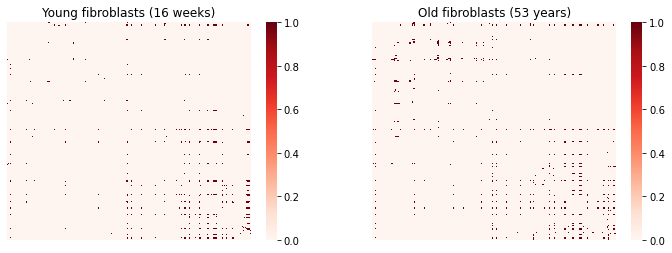

In [161]:
IMR90_random = pd.read_csv(hic_dir+'processed_hic_data_IMR90/binarized_maps/BACH2_random.csv', index_col = 0)
old_fibroblasts_random = pd.read_csv(hic_dir+'processed_hic_data_old_fibroblasts/binarized_maps/BACH2_random.csv', index_col = 0)

diff.plot_binarized_maps(IMR90_random, old_fibroblasts_random)
plt.savefig(fig_dir + 'binarized_hic_random.png')

## Simulation: number of intermingling regions per celltype

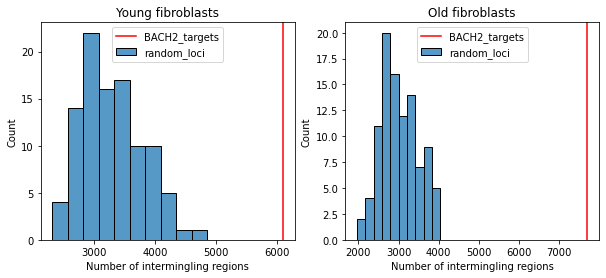

In [162]:
random_intermingling = pd.read_csv(hic_dir+'simulation_intermingling_random_loci.csv', index_col = 0)

fig, axs = plt.subplots(1, 2, figsize = (10, 4))

sns.histplot(random_intermingling, x="young", bins = 10, ax = axs[0], label = 'random_loci')
axs[0].set_title('Young fibroblasts')
axs[0].set_xlabel('Number of intermingling regions')
axs[0].axvline(x=IMR90.sum().sum()/2, color='red', label = 'BACH2_targets')
axs[0].legend()

sns.histplot(random_intermingling, x="old", bins = 10, ax = axs[1], label = 'random_loci')
axs[1].set_title('Old fibroblasts')
axs[1].set_xlabel('Number of intermingling regions')
axs[1].axvline(x=old_fibroblasts.sum().sum()/2, color='red', label = 'BACH2_targets')
axs[1].legend()

plt.savefig(fig_dir + 'significance_intermingling_BACH2.png')
plt.show()

## Simulation: percentage of shared vs. specific intermingling

In [27]:
# TO DO: Compare to difference map of random loci
# what percentage of intermingling regions is shared, old-specific, young-specific?

In [104]:
shared = np.count_nonzero(np.array(color_map) == 'common interaction')
young_specific = np.count_nonzero(np.array(color_map) == 'young-specific interaction')
old_specific = np.count_nonzero(np.array(color_map) == 'old-specific interaction')

total_intermingling = shared + young_specific + old_specific
shared = shared / total_intermingling
young_specific = young_specific / total_intermingling
old_specific = old_specific / total_intermingling

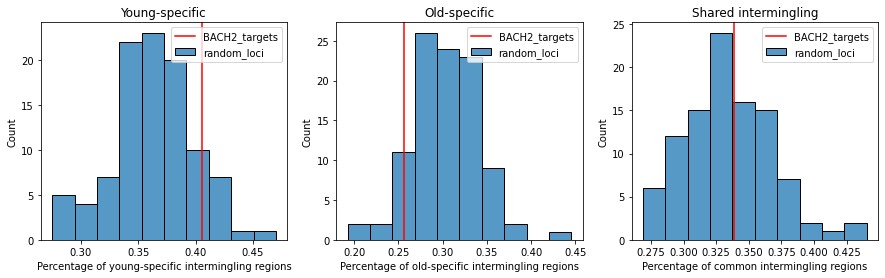

In [115]:
random_stats = pd.read_csv(hic_dir+'simulation_diff_random_loci.csv', index_col = 0)

fig, axs = plt.subplots(1, 3, figsize = (15, 4))

sns.histplot(random_stats, x="young_specific", bins = 10, ax = axs[0], label = 'random_loci')
axs[0].set_title('Young-specific')
axs[0].set_xlabel('Percentage of young-specific intermingling regions')
axs[0].axvline(x=young_specific, color='red', label = 'BACH2_targets')
axs[0].legend()

sns.histplot(random_stats, x="old_specific", bins = 10, ax = axs[1], label = 'random_loci')
axs[1].set_title('Old-specific')
axs[1].set_xlabel('Percentage of old-specific intermingling regions')
axs[1].axvline(x=old_specific, color='red', label = 'BACH2_targets')
axs[1].legend()

sns.histplot(random_stats, x="shared", bins = 10, ax = axs[2], label = 'random_loci')
axs[2].set_title('Shared intermingling')
axs[2].set_xlabel('Percentage of common intermingling regions')
axs[2].axvline(x=shared, color='red', label = 'BACH2_targets')
axs[2].legend()

plt.savefig(fig_dir + 'significance_percent_differences_BACH2.png')
plt.show()